In [87]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import MathsUtilities as MUte
%matplotlib inline

In [125]:
Colors = ['black',
 'bisque',
 'forestgreen',
 'slategrey',
 'darkgrey',
 'springgreen',
 'darkblue',
 'lightgrey',
 'orange',
 'aquamarine',
 'blue',
 'rosybrown',
 'goldenrod',
 'lightseagreen',
 'mediumpurple',
 'firebrick',
 'palegoldenrod',
 'teal',
 'thistle',
 'salmon',
 'olive',
 'cyan',
 'violet',
 'orangered',
 'yellowgreen',
 'deepskyblue',
 'orchid',
 'sandybrown',
 'lawngreen',
 'dodgerblue',
 'pink']
Markers = ['o','s','^','x']

### Link to APSIM output Data

In [89]:
con = sqlite3.connect(r'C:\Users\cflhxb\Dropbox\APSIMPotato\Potato.db')

### Read the Simulations table that has SimulationID matched to Simulation Name

In [90]:
Simulations = pd.read_sql("Select * from _Simulations",
                        con)
Simulations.set_index('ID',inplace=True)

### Read in the Factor table that links factor names and levels to simulation IDs

In [91]:
Factors = pd.read_sql("Select * from _Factors",
                        con)
Factors.set_index('SimulationID',inplace=True)

### Read in the Report generated on the Sowing Event

In [92]:
import re
def extractLocation(lcn):
    lcn = lcn.replace('MET files\\','')
    lcn = re.sub('\d','',lcn)
    lcn = lcn.replace('.met','')
    return lcn

In [93]:
InitialReport = pd.read_sql("Select * from InitialReport",
                        con)
InitialReport.loc[:,'SimulationName'] = [Simulations.loc[InitialReport.loc[x,'SimulationID'],'Name'] for x in InitialReport.index]
InitialReport.drop(['CheckpointID','Zone','Nitrogen','01','1','Field_','_','Water','Radiation','PlantDensity'],axis=1,inplace=True)
InitialReport.set_index('SimulationID',inplace=True)
InitialReport.loc[:,'Location'] = [extractLocation(x) for x in InitialReport.loc[:,'Weather.FileName']]

### List of simulation names that are in observations data set but are not triggering a sowing event

In [94]:
NotPlanted = []
for x in Simulations.index:
    if x not in InitialReport.index:
        NotPlanted.append(Simulations.loc[x,'Name'])
NotPlanted

['PYMCultivarBurbankSowingDec98',
 'PYMCultivarBurbankSowingNov98',
 'PYMCultivarBurbankSowingNov99',
 'PYMCultivarBurbankSowingOct99',
 'PYMCultivarFiannaSowingDec98',
 'PYMCultivarFiannaSowingNov98',
 'PYMCultivarFiannaSowingNov99',
 'PYMCultivarFiannaSowingOct99',
 'PYMCultivarRangerSowingDec98',
 'PYMCultivarRangerSowingNov98',
 'PYMCultivarRangerSowingNov99',
 'PYMCultivarRangerSowingOct99',
 'rainshelterIrrigation1_optimal_20@30',
 'rainshelterIrrigation10_late@150',
 'rainshelterIrrigation11_excess_30@20',
 'rainshelterIrrigation12_excess_50@30',
 'rainshelterIrrigation13_outside_optimal',
 'rainshelterIrrigation14_outside_rainfeed',
 'rainshelterIrrigation2_optimal_30@50',
 'rainshelterIrrigation3_optimal_50@70',
 'rainshelterIrrigation4_optimal_50@50',
 'rainshelterIrrigation5_early@100',
 'rainshelterIrrigation6_early@150',
 'rainshelterIrrigation7_mid@100',
 'rainshelterIrrigation8_mid@150',
 'rainshelterIrrigation9_late@100',
 'SFF_02_03SituationDuncans_100',
 'SFF_02_03Sit

### Read in report that is generated on Harvest Event

In [95]:
HarvestReport = pd.read_sql("Select * from HarvestReport",
                        con)
HarvestReport.loc[:,'SimulationName'] = [Simulations.loc[HarvestReport.loc[x,'SimulationID'],'Name'] for x in HarvestReport.index]
HarvestReport.drop(['CheckpointID','Zone','Nitrogen','01','1','Field_','_','Water','Radiation','PlantDensity'],axis=1,inplace=True)
HarvestReport.loc[:,'PlantPopn'] = 1/((HarvestReport.loc[:,'RowWidth']/1000)* (HarvestReport.loc[:,'RowSpace']/1000))
HarvestReport.loc[:,'StemPopn'] = HarvestReport.loc[:,'StemPerTuber'] *  HarvestReport.loc[:,'PlantPopn']
HarvestReport.loc[:,'Location'] = [extractLocation(x) for x in HarvestReport.loc[:,'Weather.FileName']]
HarvestReport.set_index('SimulationID',inplace=True)

## List of Simulation names that are being planted but are not triggering a harvest event

In [96]:
NotHarvested = []
for x in InitialReport.index:
    if x not in HarvestReport.index:
        NotHarvested.append(Simulations.loc[x,'Name'])
NotHarvested

[]

In [97]:
Experiments = HarvestReport.Experiment.drop_duplicates().values
Experiments

array(['ABlock', 'Baxters', 'FUE', 'FSP', 'FUE_NI', 'Parilla',
       'Penola_0607', 'Glenroy_0607', None, 'AUCB7001', 'CHBE9801',
       'CHIE98', 'CHIE980', 'CHIT980', 'CHSE98', 'CPLI9201',
       'DIJY8401Tylva_84', 'DIJY8401Tylva_85', 'DIJY8401Tylva_86',
       'DIJY9001Kap_90', 'DIJY9001Kap_91', 'DIJY9001Kap_92',
       'DIJY9001Kap_93', 'DITY8101_81', 'DITY8101_82', 'DITY8101_83',
       'IAHM9801', 'IAWM9901', 'INBA9101', 'IPSG8501', 'OSBO8801NASA_PIX',
       'PRBE9701', 'PRKO9701', 'PRPT9801', 'PRPT9802', 'PULU0801_2008',
       'PULU0801_2010', 'SCDU8401_1984', 'SCDU8401_1985', 'SFUF1001_2011',
       'SFUF1001_2012', 'UFHA1001_F1', 'UFHA1001_F2', 'UFHA1001_F3',
       'UFSF01', 'UFSF010', 'CHBE9901', 'CHIT98', 'PRPA9701', 'PRTO9301',
       'CHGR98', 'CHGR980'], dtype=object)

In [98]:
Folders = ['New Zealand', 'Australia', 'SubStor']

In [99]:
Locations = HarvestReport.loc[:,'Location'].drop_duplicates().values
Locations.sort()

In [100]:
Locations

array(['AUHU', 'Australia', 'BE', 'Barrington', 'Branxholm', 'CILM',
       'CIMO', 'CISG', 'CPLM', 'Coonawarra', 'Cressy', 'DIJY', 'DITY',
       'Deloraine', 'Devonport', 'Epping', 'Forthside', 'GR',
       'Gunnsplains', 'IAHM', 'IAWM', 'IE', 'IECA', 'INBA', 'IT',
       'Kalangadoo', 'Lameroo', 'Latrobe', 'NASA', 'OSBO', 'PRBE', 'PRCH',
       'PRKO', 'PRPA', 'PRPT', 'PRTO', 'PULU', 'Pukehohe', 'SCDU', 'SE',
       'SF', 'Sassafras', 'Sheffield', 'UFHA', 'UGKA', 'USBE',
       'Ulverstone', 'Westbury', 'Wynyard', 'lincoln'], dtype=object)

In [101]:
Cultivars = HarvestReport.Cultivar.drop_duplicates().values
Cultivars.sort()
Cultivars

array(['39707716', 'Achirana', 'Alpha', 'Amarilis', 'Asante', 'Atlantic',
       'Bintje', 'Coliban', 'Desiree', 'Dianella', 'GABRIELA', 'Horizon',
       'IB0005', 'INIAP_MARIA', 'IlamHardy', 'JerseyBenny', 'Jinguan',
       'KEXIN', 'KUFRI', 'Kaptah', 'Karaka', 'Kufri Bahar', 'Luky',
       'MARIS PIPER', 'Moonlight', 'NEISHU', 'Nadine', 'Nooksac', 'Posmo',
       'RED LASODA', 'RedRascal', 'Rua', 'RussetBurbank', 'Sava',
       'Sebago', 'Spunta', 'Tylva', 'Waycha', 'Zibaihua'], dtype=object)

In [102]:
def SortedPlot(Var,SortVar,SortList):
    Sorted = HarvestReport.sort_values(SortVar)
    Sorted.loc[:,'Linear'] = range(Sorted.index.size)
    pos=0
    tickPos = []
    pastx = -10
    ymin = Sorted.loc[:,Var].min()
    ymax = Sorted.loc[:,Var].max()
    for f in SortList:
        ffilter = Sorted.loc[:,SortVar] == f
        plt.plot(Sorted.loc[ffilter,'Linear'],Sorted.loc[ffilter,Var],
                 'o',color=Colors[pos],ms=15)
        xloc = max(Sorted.loc[ffilter,'Linear'].iloc[0],pastx+5)
        pastx = xloc
        yloc = ymin #Sorted.loc[ffilter,Var].mean()# + random.randint(-40,40)
        plt.text(xloc-5,yloc,f,fontsize=16,color=Colors[pos],rotation=-45,
                 verticalalignment='top',horizontalalignment='left')
        if pos == 30:
            pos = 0
        pos+=1
    plt.ylabel(Var,fontsize=20)  
    plt.ylim(ymin,ymax*1.1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=False,top=False, labelbottom=False,labelsize=10)
    plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True,labelsize=16)
    plt.title(Var,fontsize=30)        
    

## The following series of Graphs present a series of variables that reflect the configuration of each simulation so these can be sense checked against the rest of the validation set

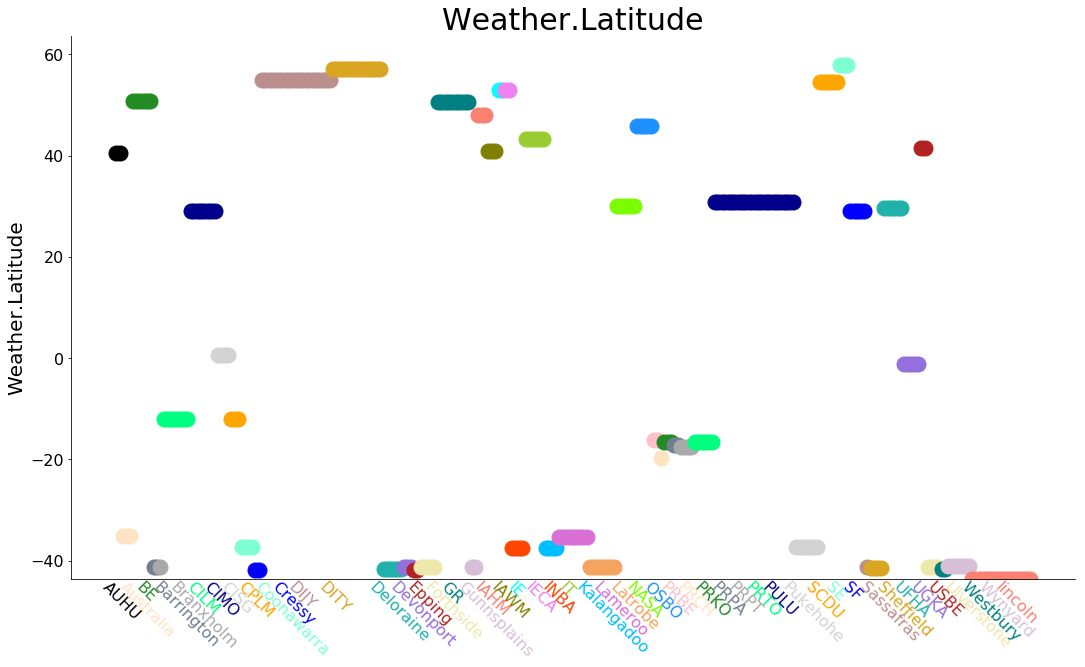

In [103]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('Weather.Latitude','Location',Locations)

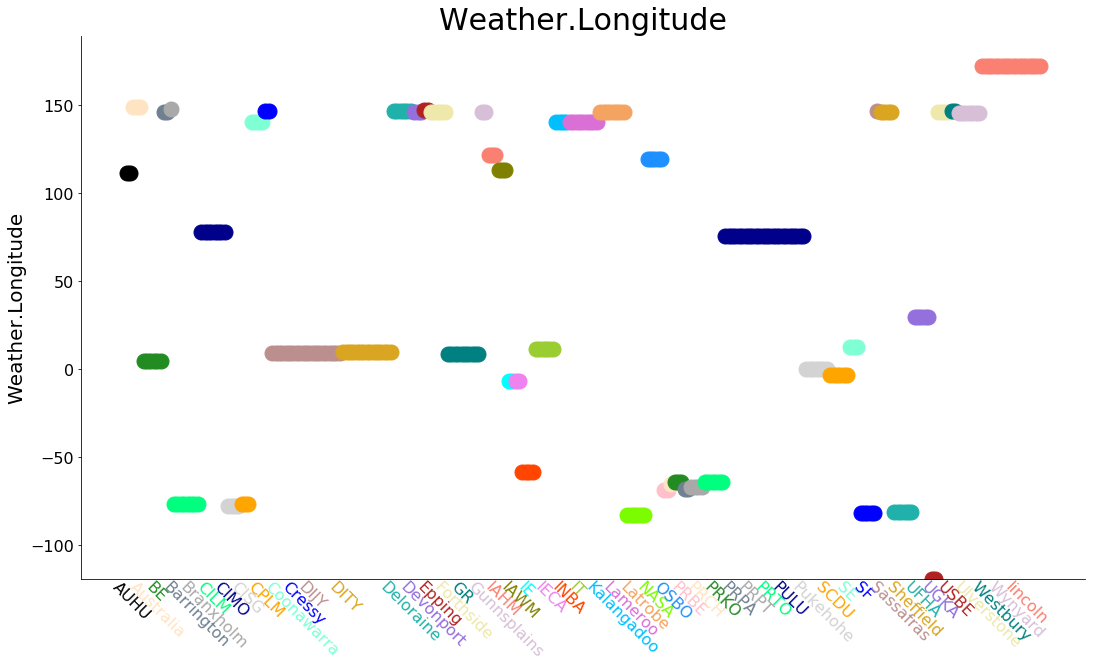

In [104]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('Weather.Longitude','Location',Locations)

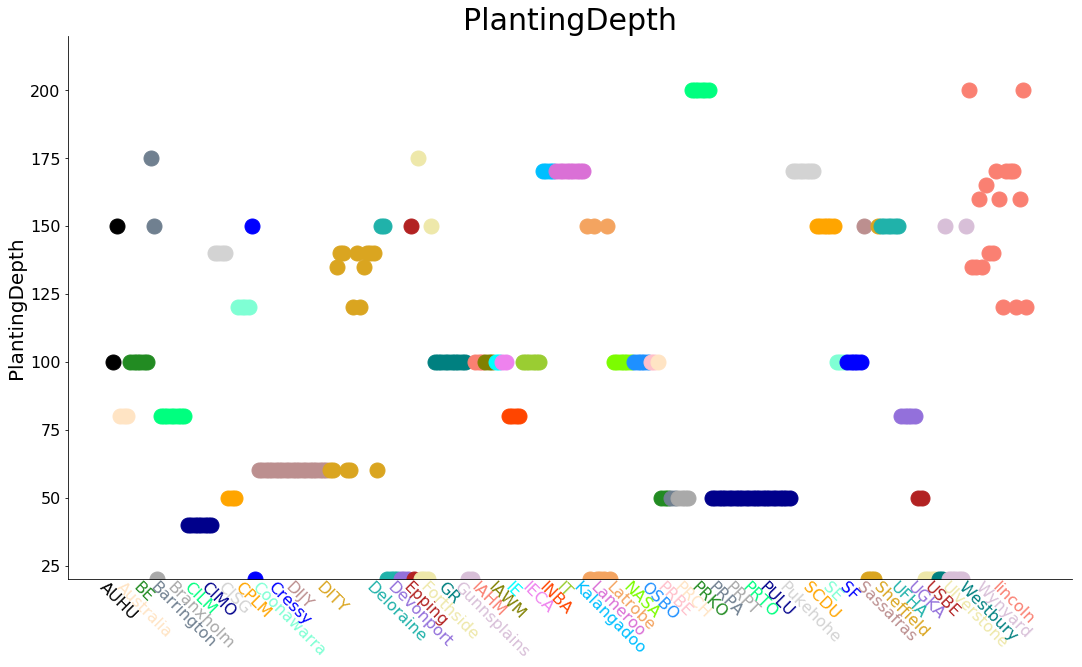

In [105]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('PlantingDepth','Location',Locations)

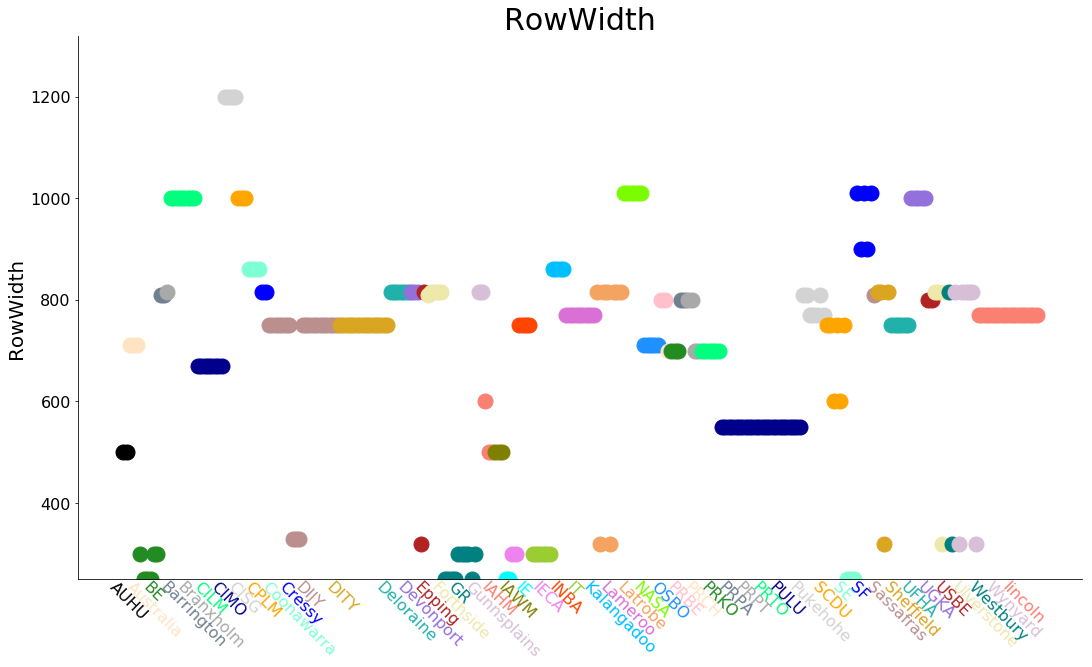

In [106]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('RowWidth','Location',Locations)

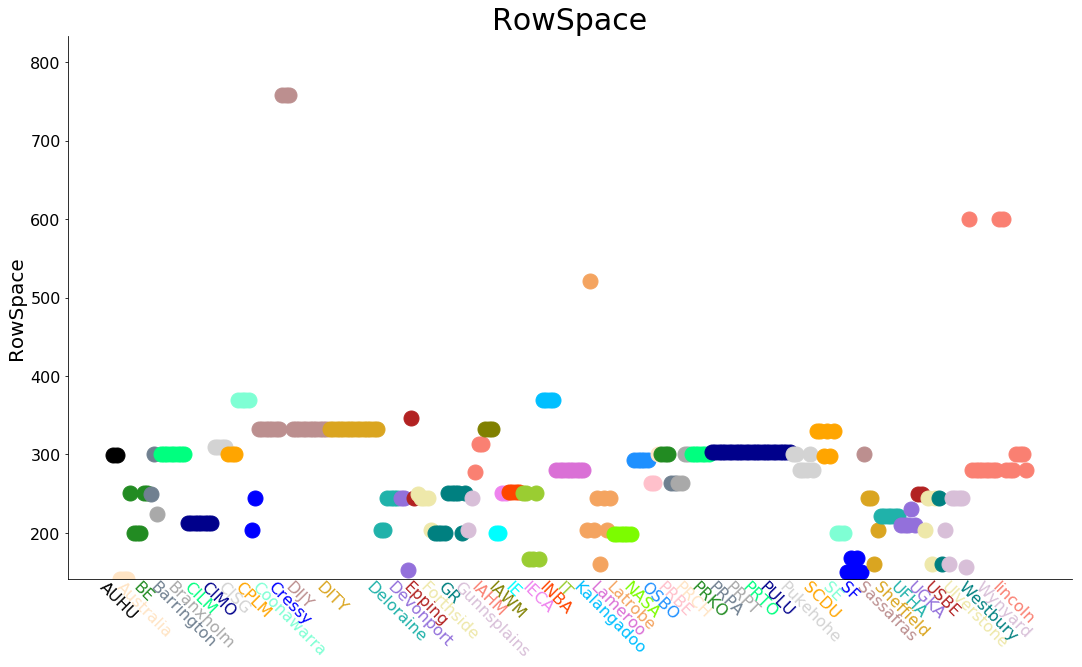

In [107]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('RowSpace','Location',Locations)

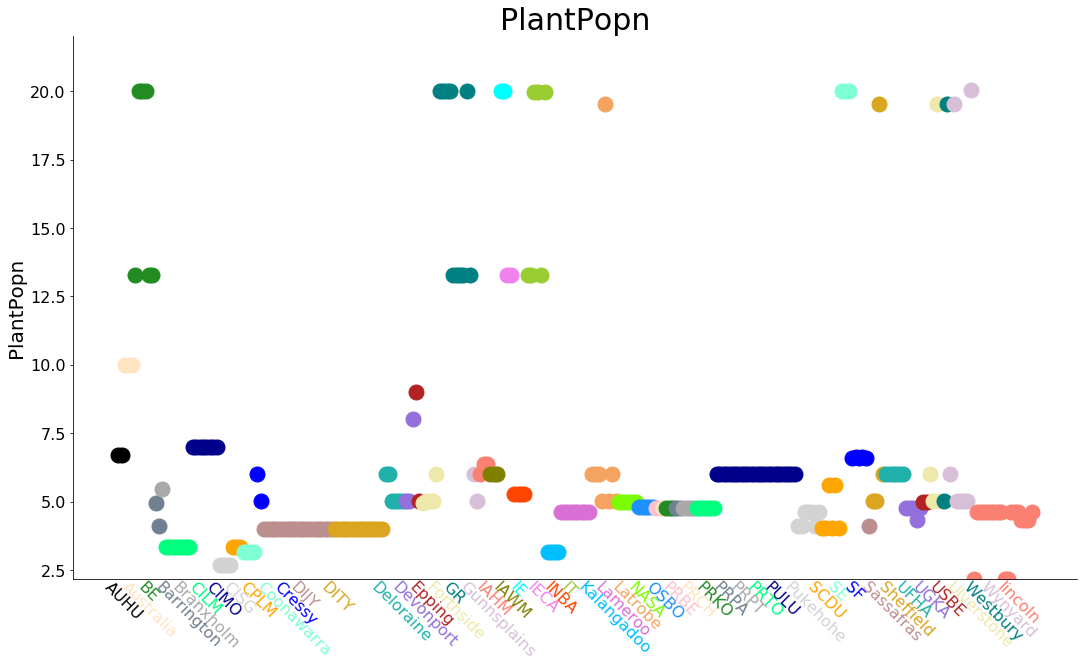

In [108]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('PlantPopn','Location',Locations)

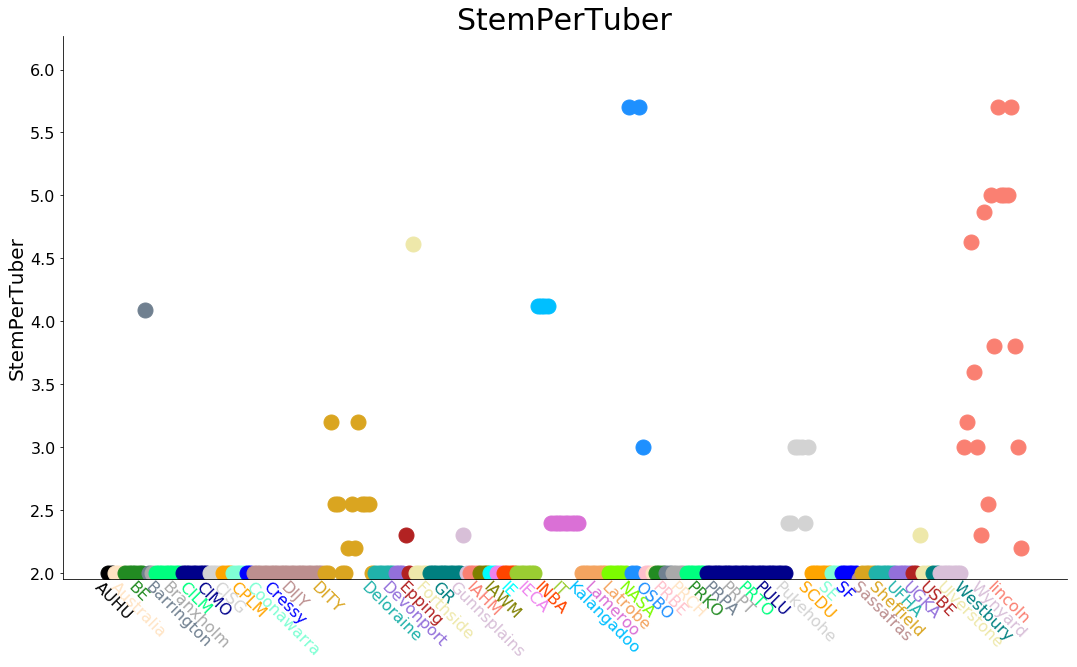

In [109]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('StemPerTuber','Location',Locations)

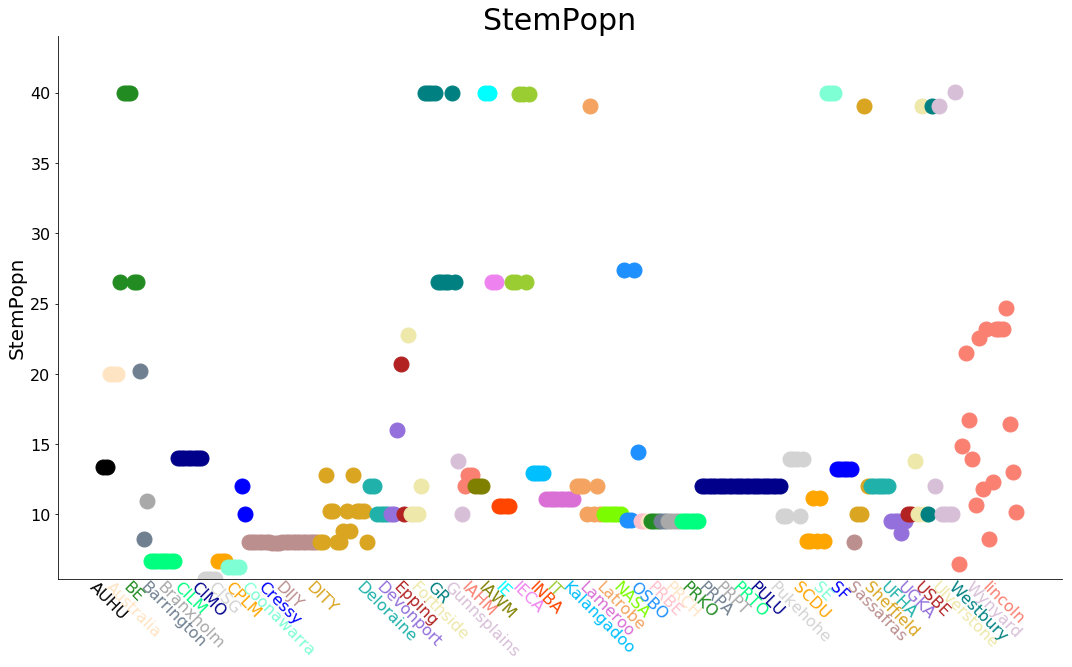

In [110]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('StemPopn','Location',Locations)

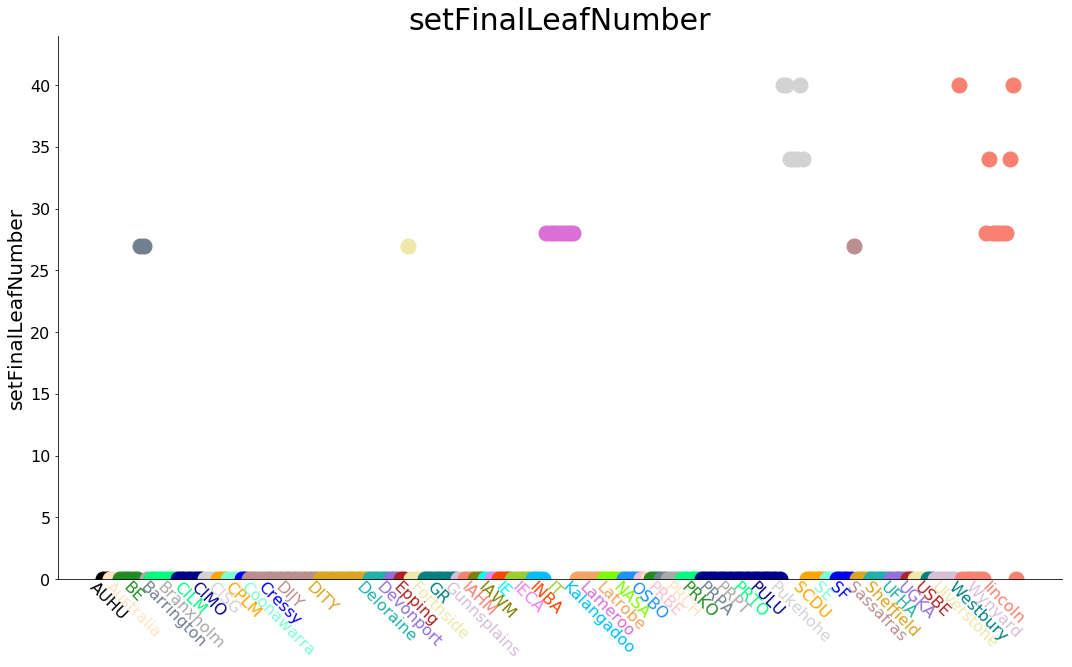

In [111]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('setFinalLeafNumber','Location',Locations)

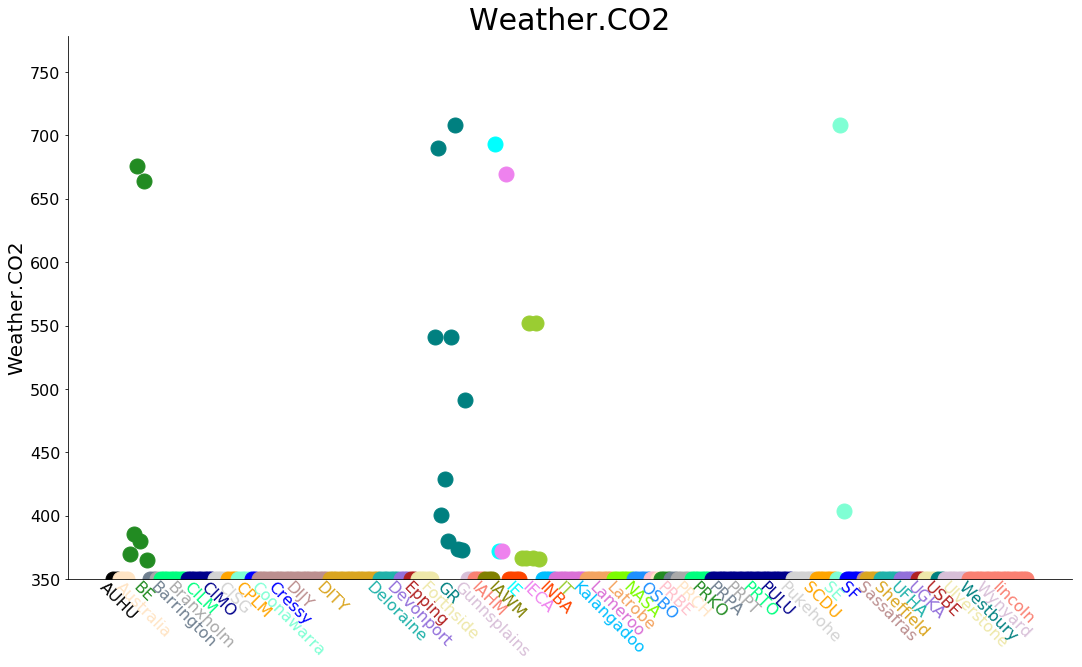

In [112]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('Weather.CO2','Location',Locations)

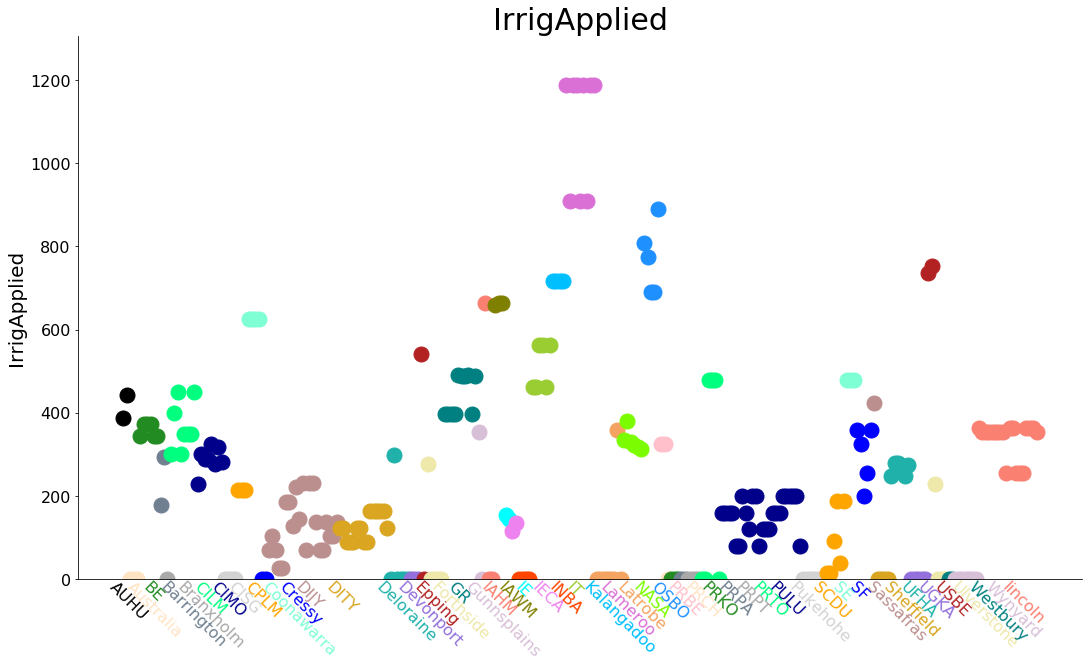

In [113]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('IrrigApplied','Location',Locations)

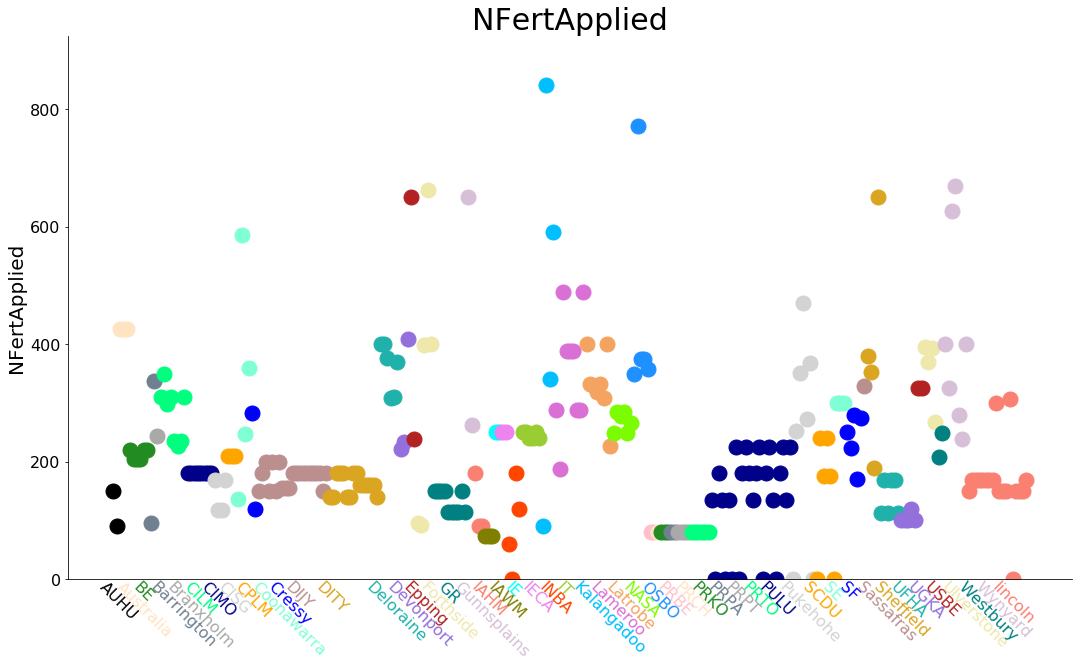

In [114]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
SortedPlot('NFertApplied','Location',Locations)

In [115]:
def plotDepthVars(VarName,depthNorm):
    Depths = InitialReport.loc[:,[X for X in InitialReport.columns if 'Depth' in X]]
    Thicks = InitialReport.loc[:,[X for X in InitialReport.columns if 'Thickness' in X]]
    Vars = InitialReport.loc[:,[X for X in InitialReport.columns if VarName in X]]
    LayerDB = pd.DataFrame()
    for x in Depths.index:
        SimLayerDB = pd.DataFrame(index = pd.MultiIndex.from_product([[x],['LayerBounds','Varval']]))
        LayerBounds = [0.0]
        depthNormFact = 1 
        if depthNorm == True:
            depthNormFact = Thicks.loc[x,:][0]
        Varvals = [Vars.loc[x,:][0]/depthNormFact]
        for l in range(9):
            try:
                if depthNorm == True:
                    depthNormFact = Thicks.loc[x,:][l]
                LayerBounds.append(float(Depths.loc[x,:][l].split('-')[1])*-1)
                Varvals.append(Vars.loc[x,:][l]/depthNormFact)
            except:
                do = 'Nothing'
        for p in range(len(LayerBounds)):
            SimLayerDB.loc[(x,'LayerBounds'),p] = LayerBounds[p]
            SimLayerDB.loc[(x,'Varval'),p] = Varvals[p]
        LayerDB = pd.concat([LayerDB,SimLayerDB])
        LayerDB.index = LayerDB.index.swaplevel()
        LayerBounds = LayerDB.stack().loc['LayerBounds']
        VarVals = LayerDB.stack().loc['Varval']
        LayerDB = pd.concat([LayerDB,SimLayerDB])
    MaxDep = LayerDB.loc[(slice(None),'LayerBounds'),:].min(axis=1).min()
    MinVar = LayerDB.loc[(slice(None),'Varval'),:].min(axis=1).min()
    MaxVar = LayerDB.loc[(slice(None),'Varval'),:].max(axis=1).max()    
    Graph = plt.figure(figsize=(10,20))
    cols = np.ceil(len(Locations)/5)
    pos=1
    for lcn in Locations:
        ax = Graph.add_subplot(cols,5,pos)
        #for x in Depths.index:
        #    plcn = InitialReport.loc[x,'Location']
        plt.plot(VarVals,LayerBounds,'o',color = 'lightgrey')
        plt.text(0.03,1.0,lcn,transform=ax.transAxes,fontsize=12)
        LocalVars = HarvestReport.loc[HarvestReport.loc[:,'Location']==lcn,:].index
        for l in LocalVars:
            plt.plot(LayerDB.loc[(l,'Varval'),:],LayerDB.loc[(l,'LayerBounds'),:],'-o',color = 'red')
        plt.ylim(MaxDep*1.05,0)
        plt.xlim(MinVar * 0.8,MaxVar * 1.05)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        if pos in range(1,200,5):
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True,labelsize=10)
            plt.ylabel('Depth (cm)',fontsize=12)
        else:
            plt.tick_params(axis='y', which='both', left=False,right=False, labelleft=False,labelsize=10)
        if pos in list(range(len(Locations)-4,len(Locations)+1)):
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
            plt.xlabel(VarName,fontsize=12)
        else:
            plt.tick_params(axis='x', which='both', bottom=False,top=False, labelbottom=False,labelsize=10)
        pos += 1
    plt.tight_layout

## The flowing series of graphs show CropSoil configuration settings for each simulation so they can be sense checked against the rest of the validation set

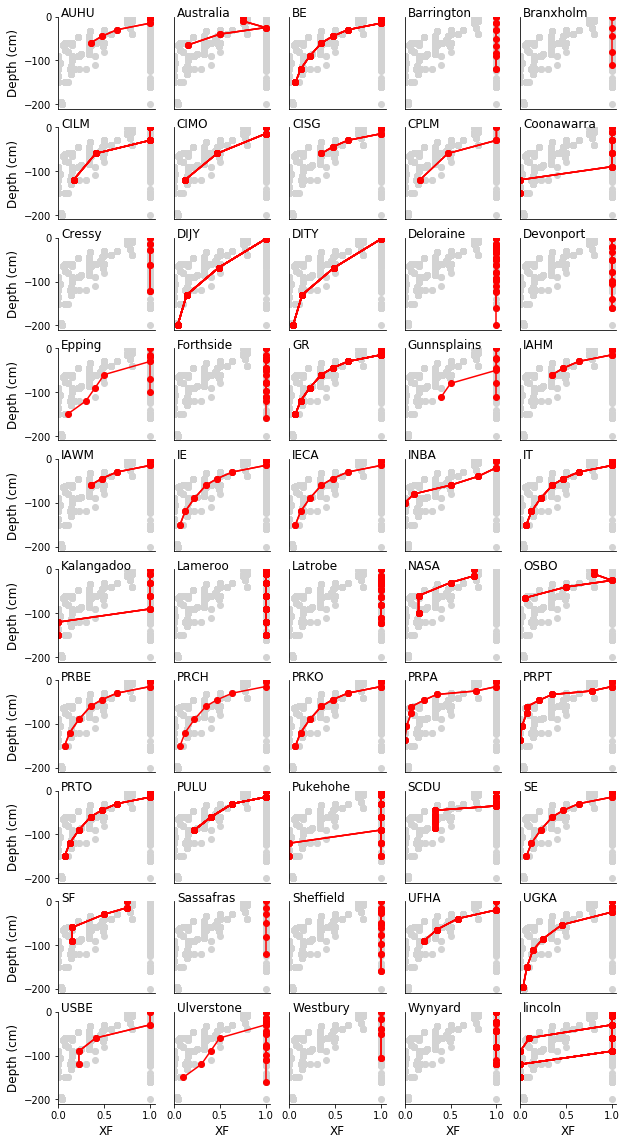

In [116]:
plotDepthVars('XF',False)

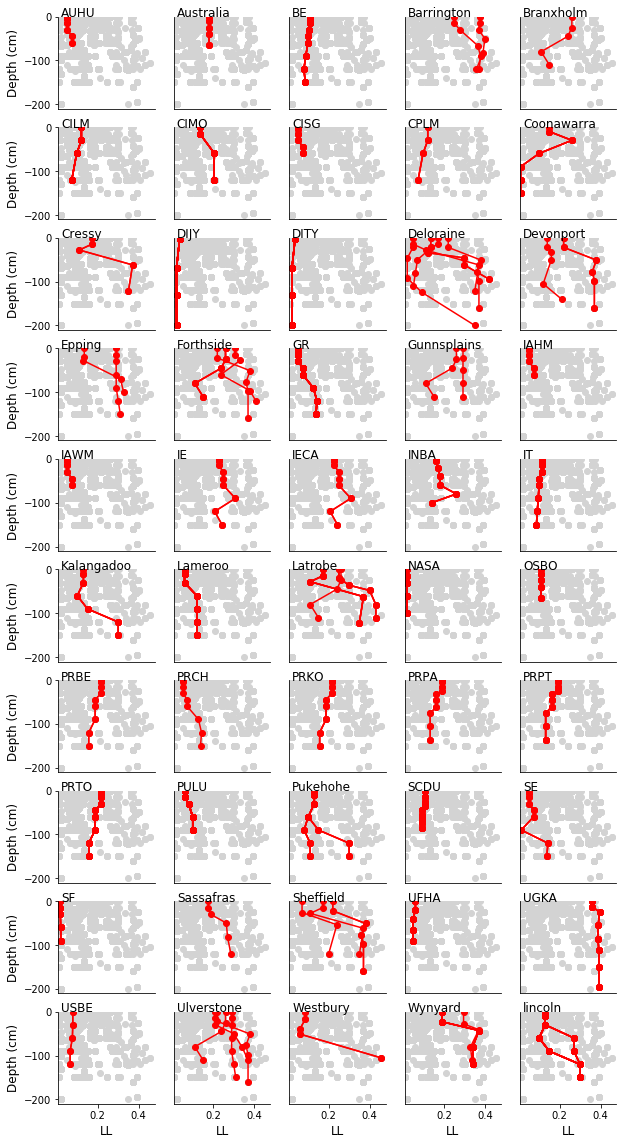

In [117]:
plotDepthVars('LL',False)

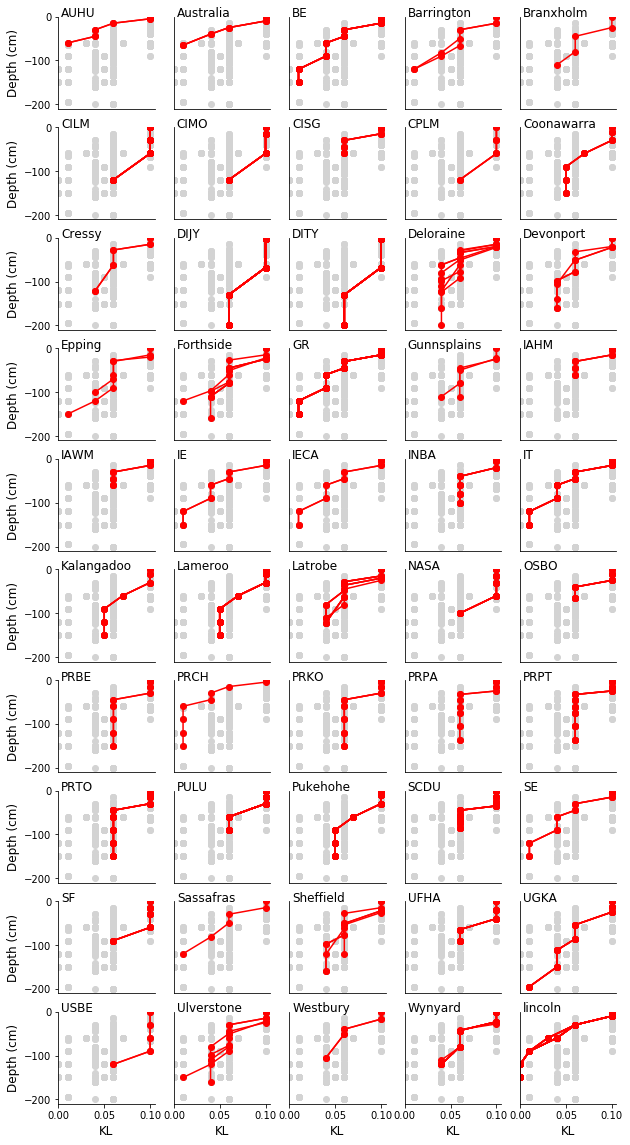

In [118]:
plotDepthVars('KL',False)

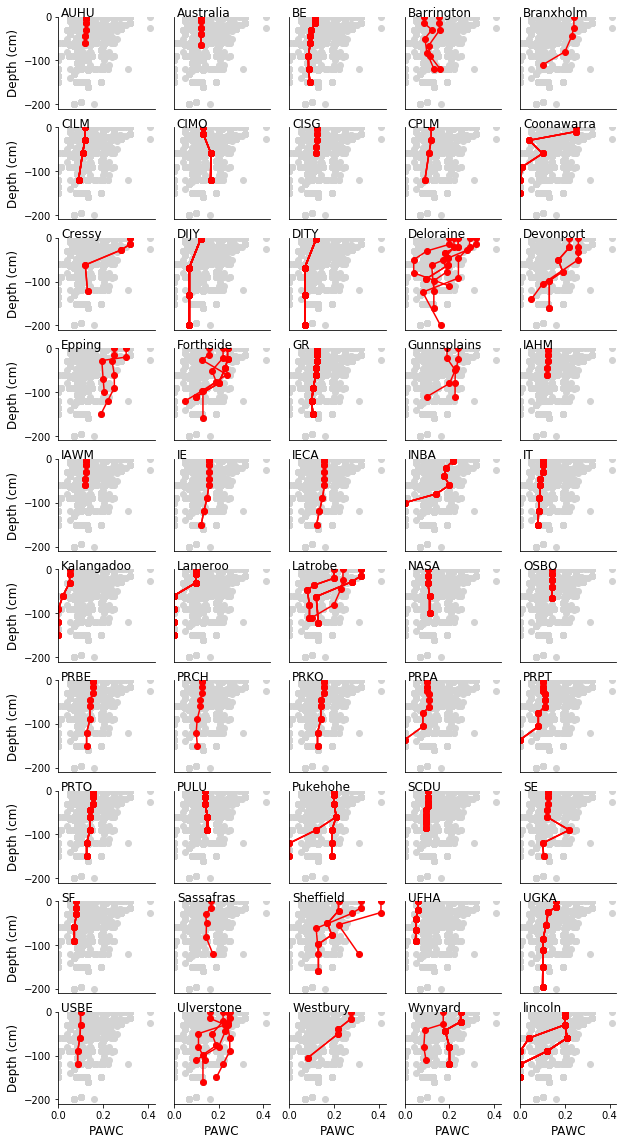

In [119]:
plotDepthVars('PAWC',True)

In [120]:
HarvestPreObs = pd.read_sql("Select * from FinalYieldData",
                        con)
HarvestPreObs.loc[:,'SimulationName'] = [Simulations.loc[HarvestPreObs.loc[x,'SimulationID'],'Name'] for x in HarvestPreObs.index]
HarvestPreObs.set_index('SimulationID',inplace=True)

In [123]:
def MakeLabel(RegStats):
    #text = RegStats.Name + '  n = ' + str(RegStats.n)
    text = '\ny = ' + '%.2f'%RegStats.Intercept + '(se ' + '%.2f'%RegStats.SEintercept + ') + ' + '%.2f'%RegStats.Slope + '(se ' + '%.2f'%RegStats.SEslope + ') x' 
    text += '\n$r^2$ =' + '%.2f'%RegStats.R2 + ' RMSE = ' + '%.2f'%RegStats.RMSE +' NSE = ' + '%.2f'%RegStats.NSE
    text += '\nME = ' + '%.2f'%RegStats.ME + ' MAE = ' + '%.2f'%RegStats.MAE
    text += '\nn = ' + str(RegStats.n)
    return text

def AddObsPredGraph(Variables,Units,Names,DataTable):
    Pos = 1
    for Var in Variables:
        NaNFilter = np.isnan(DataTable.loc[:,'Predicted.Potato.'+Var]) | np.isnan(DataTable.loc[:,'Observed.Potato.'+Var])
        IaNFilter = ~NaNFilter
        Obs = DataTable.loc[:,'Observed.Potato.'+Var].loc[IaNFilter].values
        Pred = DataTable.loc[:,'Predicted.Potato.'+Var].loc[IaNFilter].values
        Graph.add_subplot(3,3,Pos)
        ColPos = 0
        MarPos = 0
        for lcn in Locations:
            SimIDs = HarvestReport.loc[HarvestReport.Location == lcn].index.values
            ExpObs = DataTable.loc[SimIDs,'Observed.Potato.'+Var]
            ExpPred = DataTable.loc[SimIDs,'Predicted.Potato.'+Var]
            plt.plot(ExpObs,ExpPred,Markers[MarPos],color = Colors[ColPos],label=lcn)
            ColPos +=1
            if ColPos > 1:
                ColPos = 1
                MarPos +=1
        uplim = max(Obs.max(),Pred.max())*1.1
        lowlim = min(Obs.min(),Pred.min())*0.95
        plt.title(Names[Pos-1] + ' (' + Units[Pos-1] + ')')
        plt.ylim(0,uplim)
        plt.xlim(0,uplim)
        plt.plot([lowlim,uplim*.95],[lowlim,uplim*.95],'-')
        RegStats = MUte.MathUtilities.CalcRegressionStats(Var,Pred,Obs)
        LabelText = MakeLabel(RegStats)
        plt.text(uplim*0.05,uplim*.78,LabelText)
        #Fit linear regression to current series and store slope and intercept in dataframe
        ModFit = sm.regression.linear_model.OLS(Pred,  # Y variable
                                            sm.add_constant(Obs), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
        RegFit = ModFit.fit();  # fit models parameters
        Slope = RegFit.params[1] 
        Intercept = RegFit.params[0]
        Xs = [lowlim,uplim*.95]
        Ys = [Intercept + Xs[0]*Slope,Intercept + Xs[1]*Slope]
        plt.plot(Xs,Ys,'--')
        Pos +=1

## Standard Obs vs Pred graph for Harvest

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


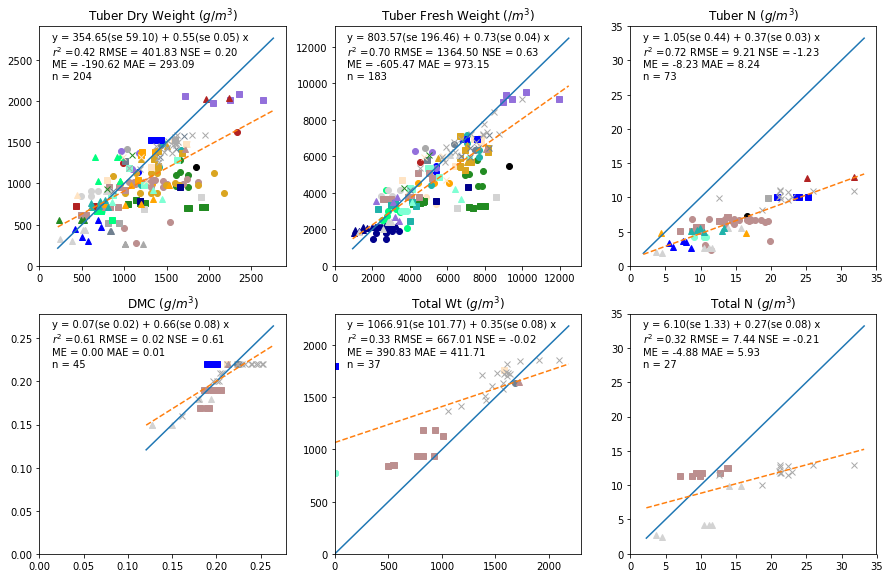

In [126]:
Graph = plt.figure(figsize=(15,15))
Variables = ['Tuber.Live.Wt','Tuber.LiveFWt','Tuber.Live.N',
             'Tuber.LiveFWt.DryMatterContent.Value()','TotalLive.Wt','TotalLive.N']
Units = ['$g/m^3$','$/m^3$','$g/m^3$',
        '$g/m^3$','$g/m^3$','$g/m^3$',
        'days','days']
Names = ['Tuber Dry Weight','Tuber Fresh Weight', 'Tuber N','DMC','Total Wt', 'Total N']
AddObsPredGraph(Variables,Units,Names,HarvestPreObs)

In [127]:
DailyPreObs = pd.read_sql("Select * from TimeSeriesData",
                        con)
DailyPreObs.loc[:,'SimulationName'] = [Simulations.loc[DailyPreObs.loc[x,'SimulationID'],'Name'] for x in DailyPreObs.index]
DailyPreObs.set_index('SimulationID',inplace=True)

## Standard Obs vs Pre graph for time series data

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


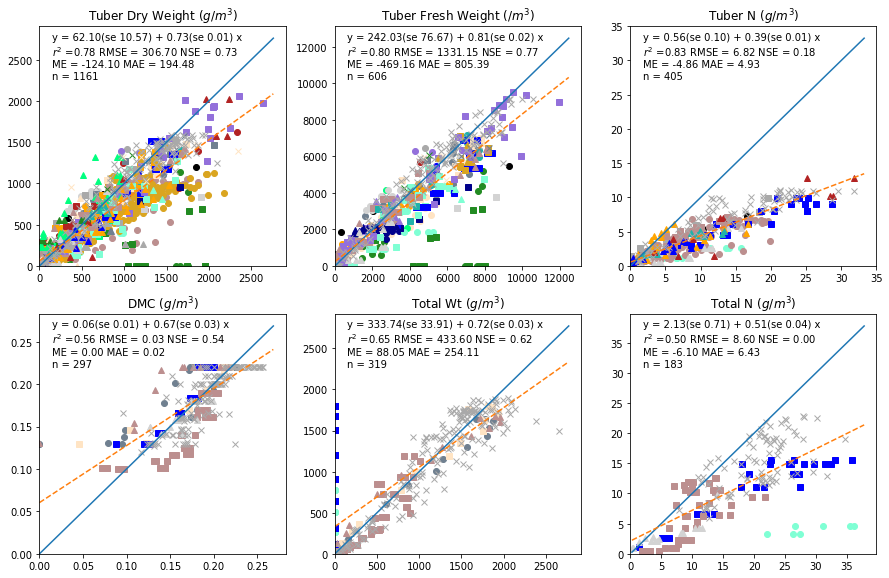

In [128]:
Graph = plt.figure(figsize=(15,15))
Variables = ['Tuber.Live.Wt','Tuber.LiveFWt','Tuber.Live.N',
             'Tuber.LiveFWt.DryMatterContent.Value()','TotalLive.Wt','TotalLive.N']
Units = ['$g/m^3$','$/m^3$','$g/m^3$',
        '$g/m^3$','$g/m^3$','$g/m^3$',
        'days','days']
Names = ['Tuber Dry Weight','Tuber Fresh Weight', 'Tuber N','DMC','Total Wt', 'Total N']
AddObsPredGraph(Variables,Units,Names,DailyPreObs)

In [129]:
HarvestResiduals = HarvestPreObs.loc[:,[X for X in HarvestPreObs.columns if 'Pred-Obs' in X]].copy()

In [130]:
def GroupResidulesGraph(ResidulesTable,Grouping,GroupLabel):
    panpos = 1
    Variables = ['Tuber.LiveFWt.DryMatterContent.Value()','Tuber.Live.N', 
 'Tuber.Live.NConc','Tuber.Live.Wt', 'Tuber.LiveFWt']
    for Var in Variables:
        ax = Graph.add_subplot(5,1,panpos)
        startx = 0
        tickPoss = []
        tickLabs = []
        colpos = 1
        upper = ResidulesTable.loc[:,'Pred-Obs.Potato.' + Var].max() * 1.1
        lower = ResidulesTable.loc[:,'Pred-Obs.Potato.' + Var].min() * 1.1
        MeanResidual = ResidulesTable.loc[:,'Pred-Obs.Potato.' + Var].mean()
        TextPos = 'Lower'
        for group in Grouping:
            SimIDs = HarvestReport.loc[HarvestReport.loc[:,GroupLabel]==group,:].index.values
            xvals = range(startx,startx+len(SimIDs))
            plt.plot(xvals,ResidulesTable.reindex(SimIDs,axis=0).loc[:,'Pred-Obs.Potato.' + Var],
                     '-o',color=Colors[colpos])
            #tickPoss.append(startx+len(SimIDs)/2)
            tickLabs.append(group)
            if TextPos=='Lower':
                plt.text(startx+len(SimIDs)/2,lower,group,fontsize=16,
                         color=Colors[colpos],rotation=-45,verticalalignment='bottom',horizontalalignment='center')
                TextPos = 'Upper'
            else:
                plt.text(startx+len(SimIDs)/2,upper,group,fontsize=16,
                         color=Colors[colpos],rotation=-45,verticalalignment='top',horizontalalignment='center')
                TextPos = 'Lower'
            startx += len(SimIDs)
            if colpos == 30:
                colpos = 0
            colpos+=1
        ax.xaxis.set_major_locator(plt.FixedLocator(tickPoss))
        ax.set_xticklabels(tickLabs)
        plt.tick_params(rotation=90)
        plt.plot([0,startx],[MeanResidual,MeanResidual],'-',lw=3,color='k')
        plt.plot([0,startx],[0,0],'--',lw=3,color='k')
        plt.ylim(lower,upper)
        plt.title(Var,fontsize=25)
        plt.ylabel('Pred-Obs')
        panpos+=1

## Graph residuals for key variables grouped by cultivar

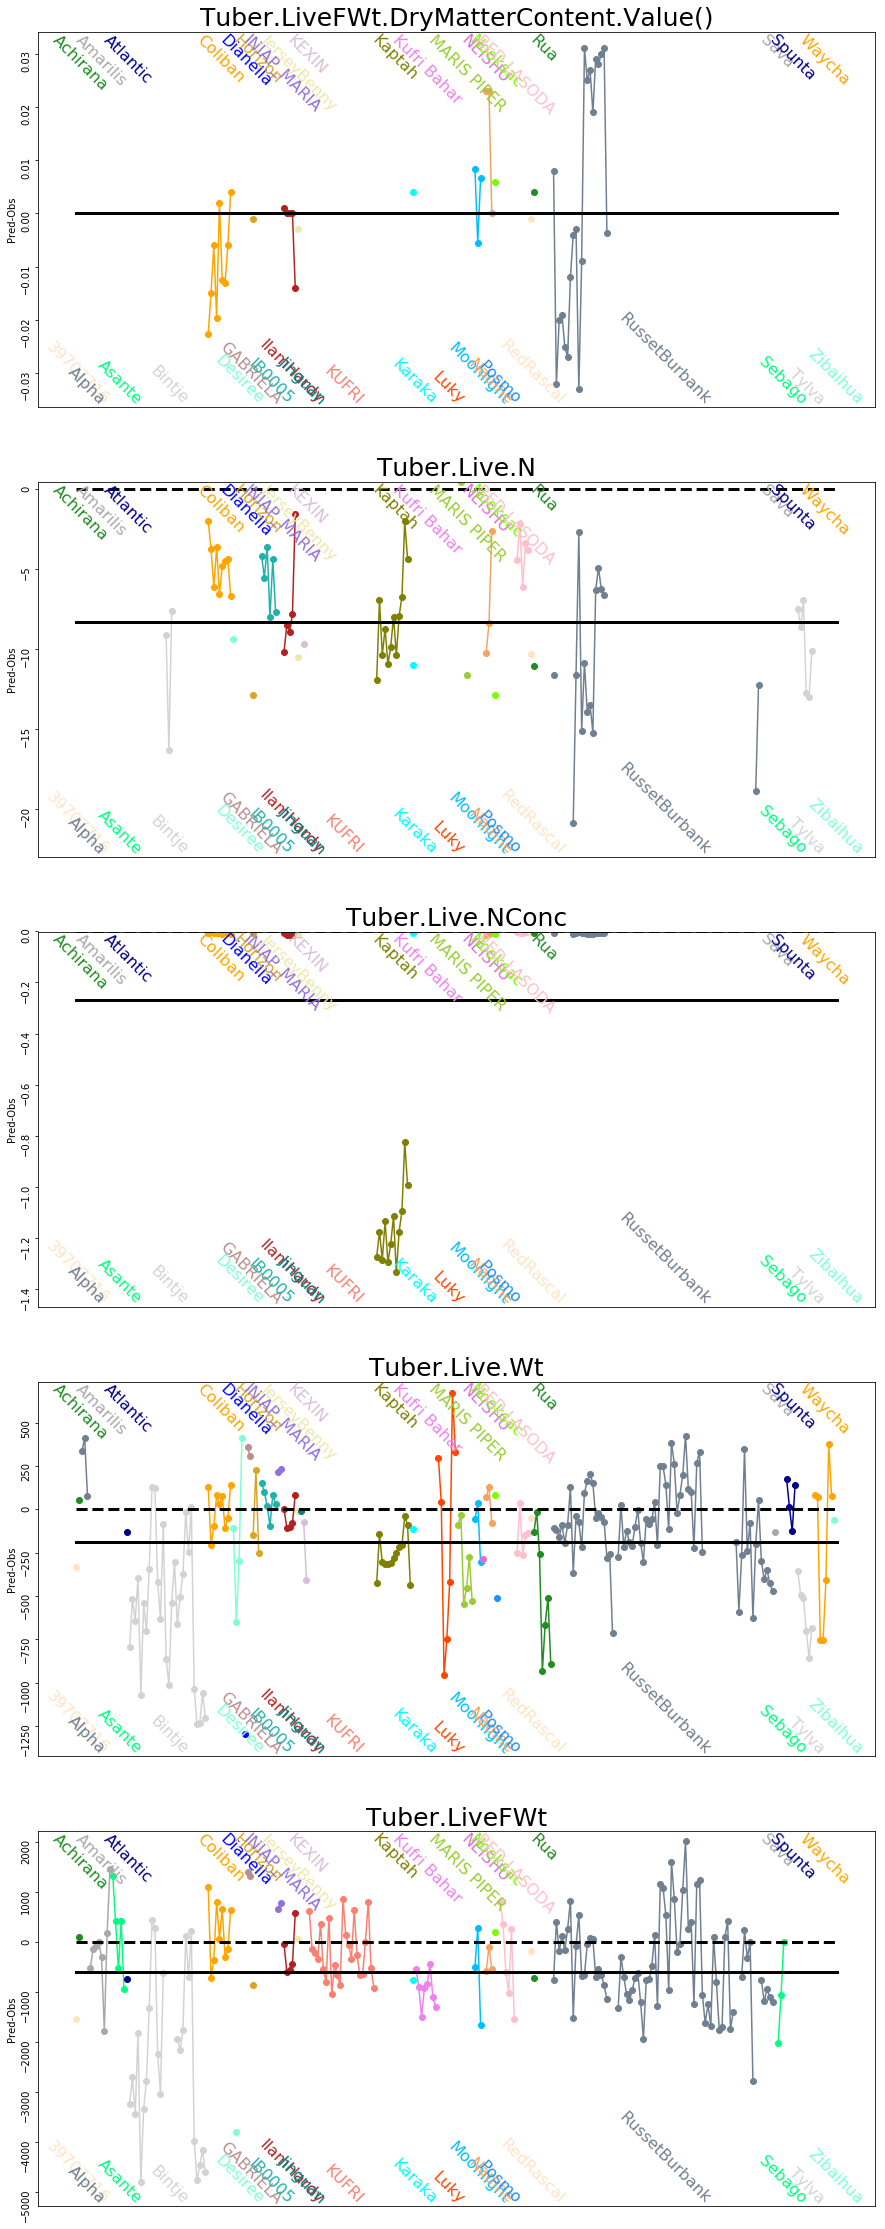

In [131]:
Graph = plt.figure(figsize=(15,40))
GroupResidulesGraph(HarvestResiduals,Cultivars,'Cultivar')

## Graph residuals for key variables grouped by location

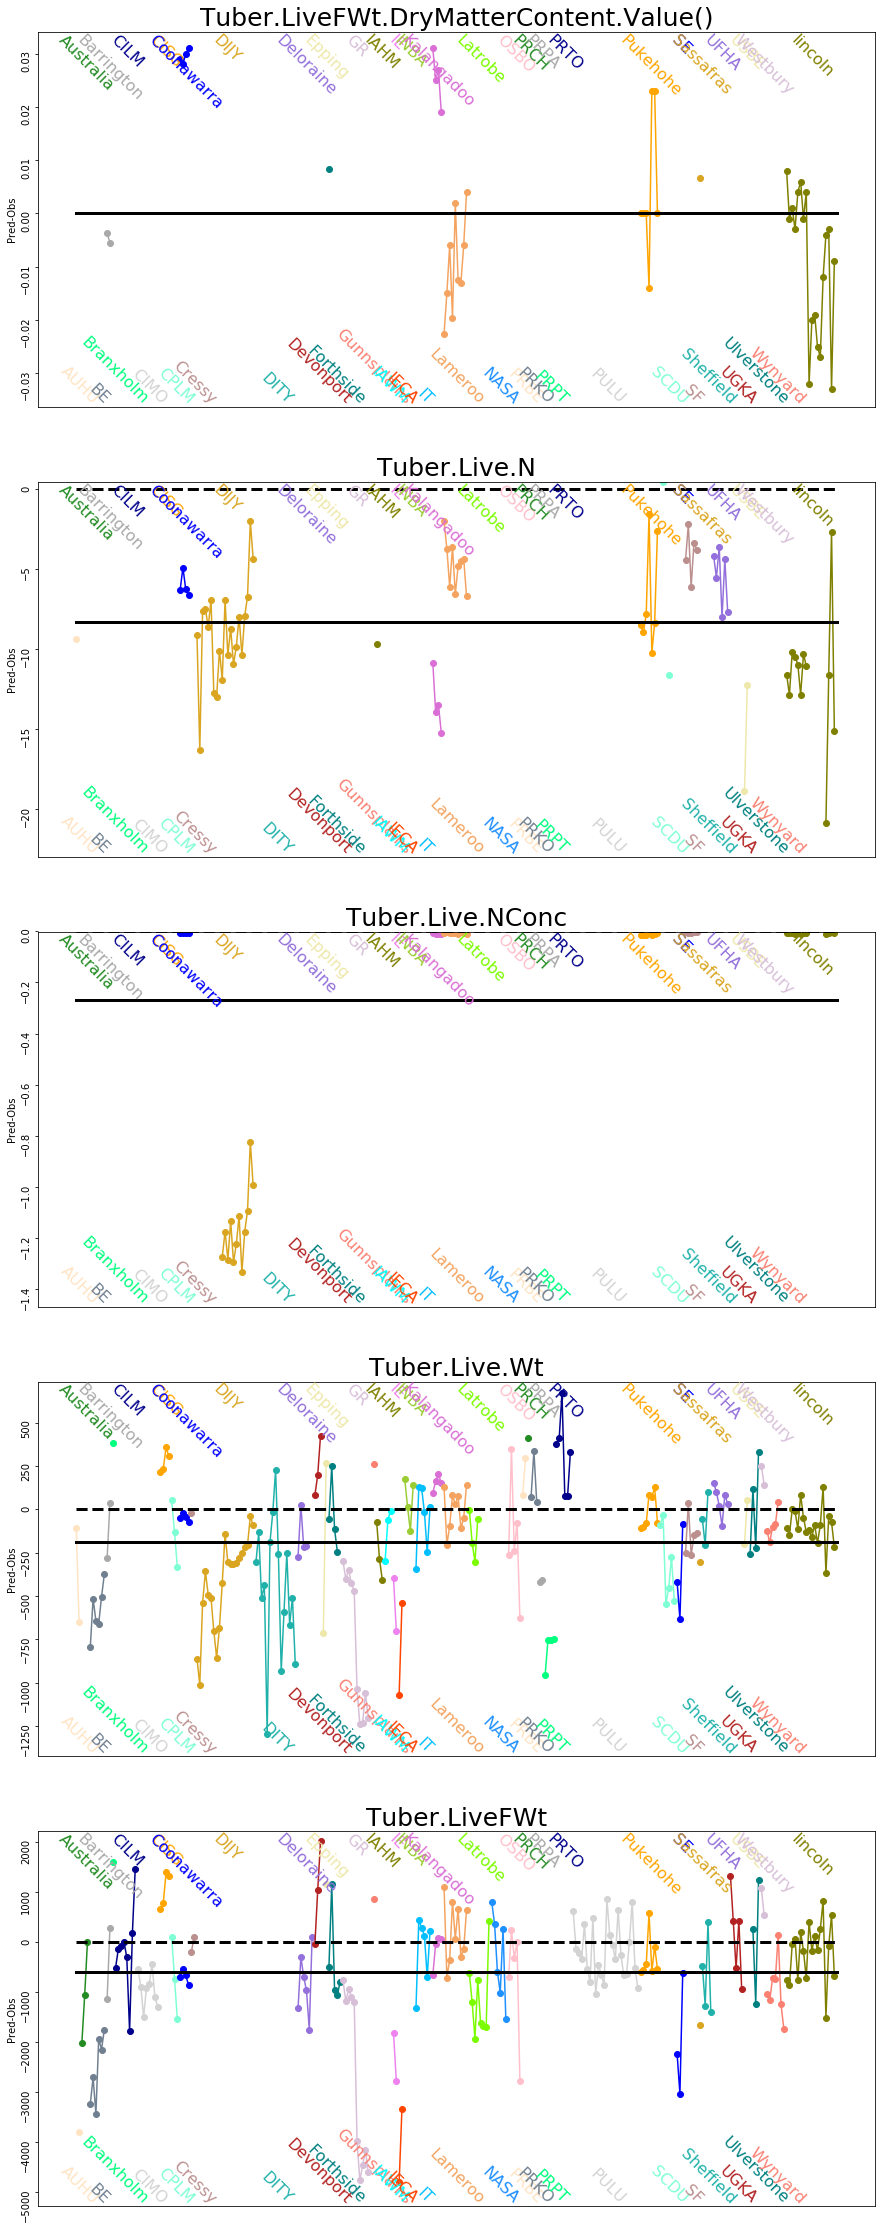

In [132]:
Graph = plt.figure(figsize=(15,40))
GroupResidulesGraph(HarvestResiduals,Locations,'Location')

## Make graphs of residuals vs simulation configuration variables

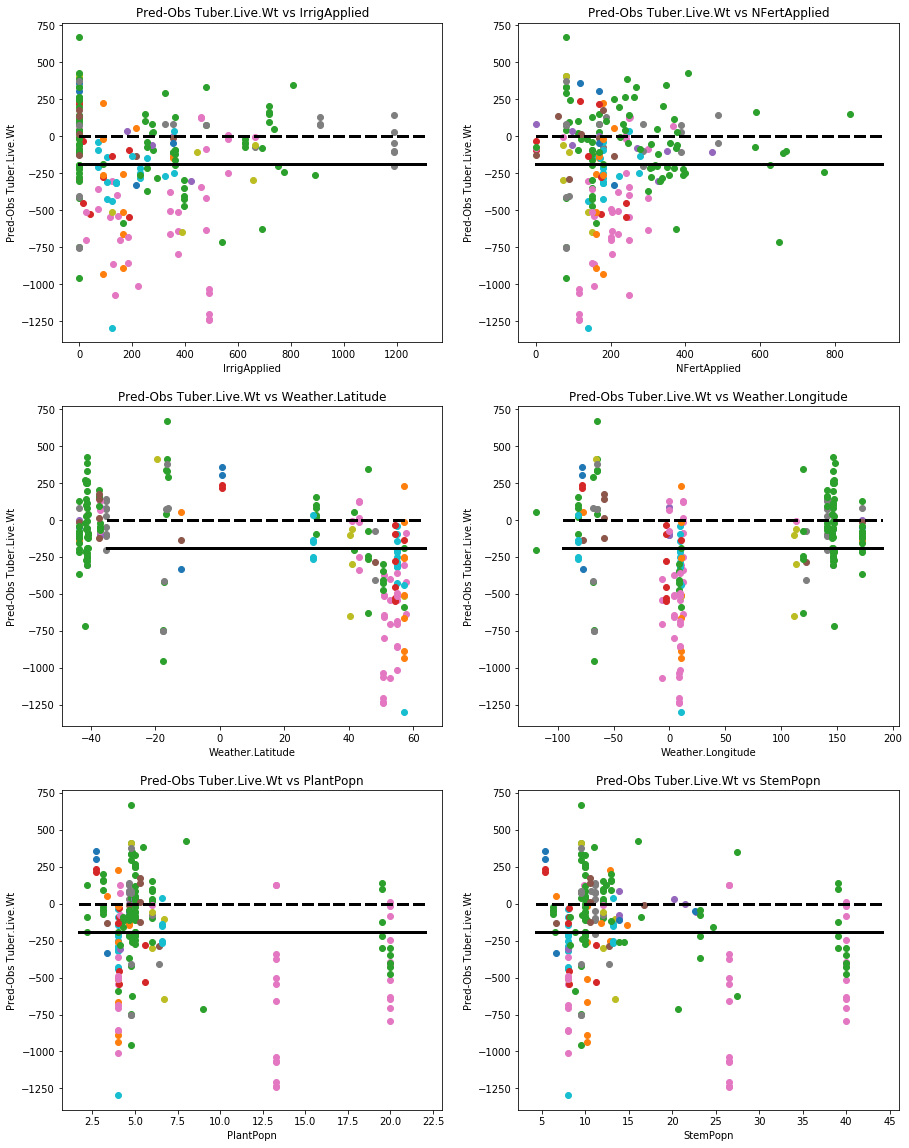

In [133]:
def ResidulesVsVariable(ResidulesTable,Variable,Grouping,GroupLabel):
    pos = 1
    for vsVariable in ['IrrigApplied','NFertApplied','Weather.Latitude',
                       'Weather.Longitude','PlantPopn','StemPopn']:
        Graph.add_subplot(3,2,pos)
        for group in Grouping:
            SimIDs = HarvestReport.loc[HarvestReport.loc[:,GroupLabel]==group,:].index.values
            yvals = ResidulesTable.reindex(SimIDs,axis=0).loc[:,'Pred-Obs.Potato.'+Variable]
            xvals = HarvestReport.reindex(SimIDs,axis=0).loc[:,vsVariable]
            plt.plot(xvals,yvals,'o')
            upper = HarvestReport.loc[:,vsVariable].max() * 1.1
            lower = HarvestReport.loc[:,vsVariable].min() * 0.8
            MeanResidual = ResidulesTable.loc[:,'Pred-Obs.Potato.' + Variable].mean()
            plt.plot([lower,upper],[MeanResidual,MeanResidual],'-',lw=3,color='k')
            plt.plot([lower,upper],[0,0],'--',lw=3,color='k')
            plt.title('Pred-Obs ' + Variable + ' vs ' + vsVariable)
            plt.ylabel('Pred-Obs ' + Variable)
            plt.xlabel(vsVariable)
        pos+=1
Graph = plt.figure(figsize=(15,20))
ResidulesVsVariable(HarvestResiduals,'Tuber.Live.Wt',Cultivars,'Cultivar')

In [134]:
DailyObsPredSims = DailyPreObs.index.drop_duplicates()
SimsWithTimeCoarsData = []
for sim in DailyObsPredSims:
    try:
        obsNo = DailyPreObs.loc[sim,'Clock.Today'].values
        SimsWithTimeCoarsData.append(sim)
    except:
        do = 'Nothing'
LocationsWithTimeCoarseData = HarvestReport.reindex(SimsWithTimeCoarsData,axis=0).loc[:,'Location'].dropna().drop_duplicates().values
LocationsWithTimeCoarseData.sort()
CultivarsWithTimeCoarseData = HarvestReport.reindex(SimsWithTimeCoarsData,axis=0).loc[:,'Cultivar'].dropna().drop_duplicates().values
CultivarsWithTimeCoarseData.sort()

In [135]:
DailyReport = pd.read_sql("Select * from DailyReport",
                        con)
DailyReport.loc[:,'SimulationName'] = [Simulations.loc[DailyReport.loc[x,'SimulationID'],'Name'] for x in DailyReport.index]
DailyReport.drop(['CheckpointID','Zone','Nitrogen','01','1','Field_','_','Water','Radiation','PlantDensity'],axis=1,inplace=True)
DailyReport.set_index('SimulationID',inplace=True)

In [136]:
def ResidulesVsTtSow(Variable,Grouping,GroupLabel):
    cols = np.ceil(len(Grouping)/5)
    pos=1
    upper = DailyPreObs.loc[:,'Pred-Obs.Potato.'+Variable].max() * 1.1
    lower = DailyPreObs.loc[:,'Pred-Obs.Potato.'+Variable].min() * 0.8
    MeanResidual = DailyPreObs.loc[:,'Pred-Obs.Potato.'+Variable].mean()

    for group in Grouping:
        ax = Graph.add_subplot(cols,5,pos)
        simsInGroup = HarvestReport.loc[HarvestReport.loc[:,GroupLabel]==group].index
        GroupSimsWithTimeCoarseData = list(set(HarvestReport.loc[HarvestReport.loc[:,GroupLabel]==group].index) & set(SimsWithTimeCoarsData))
        for sim in GroupSimsWithTimeCoarseData:
            residuals = DailyPreObs.loc[sim,'Pred-Obs.Potato.'+Variable]
            DatesWithObs = DailyReport.loc[:,'Clock.Today'].isin(DailyPreObs.loc[sim,'Clock.Today'])
            TtSow = DailyReport.loc[DatesWithObs,:].loc[sim,'Potato.Phenology.AccumulatedEmergedTT'].values
            plt.plot(TtSow,residuals,'o',color='red')
        plt.text(0.03,1.0,group,transform=ax.transAxes,fontsize=12)
        plt.ylim(lower,upper)
        plt.plot([0,2300],[MeanResidual,MeanResidual],'-',lw=3,color='k')
        plt.plot([0,2300],[0,0],'--',lw=3,color='k')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        if pos in range(1,200,5):
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True,labelsize=10)
            plt.ylabel('Pred-Obs '+Variable,fontsize=12)
        else:
            plt.tick_params(axis='y', which='both', left=False,right=False, labelleft=False,labelsize=10)
        if pos in list(range(len(Grouping)-4,len(LocationsWithTimeCoarseData)+1)):
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
            plt.xlabel('TtAccumSow',fontsize=12)
        else:
            plt.tick_params(axis='x', which='both', bottom=False,top=False, labelbottom=False,labelsize=10)
        pos+=1
    plt.tight_layout

## Make Graphs of tuber live Wt residuals for each location plotted against thermal time since sowing

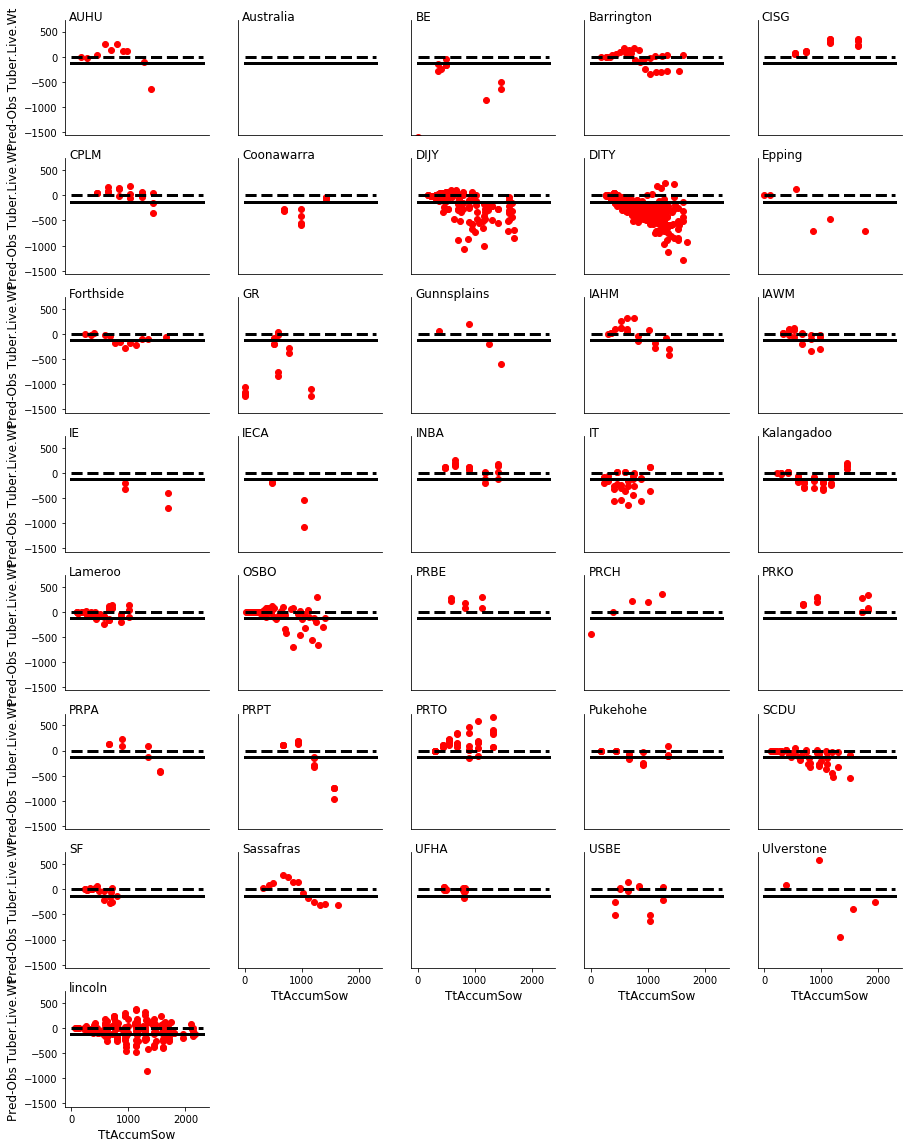

In [137]:
Graph = plt.figure(figsize=(15,20))
ResidulesVsTtSow('Tuber.Live.Wt',LocationsWithTimeCoarseData,'Location')

## Make Graphs of tuber live Wt residuals for each Cultivar plotted against thermal time since sowing

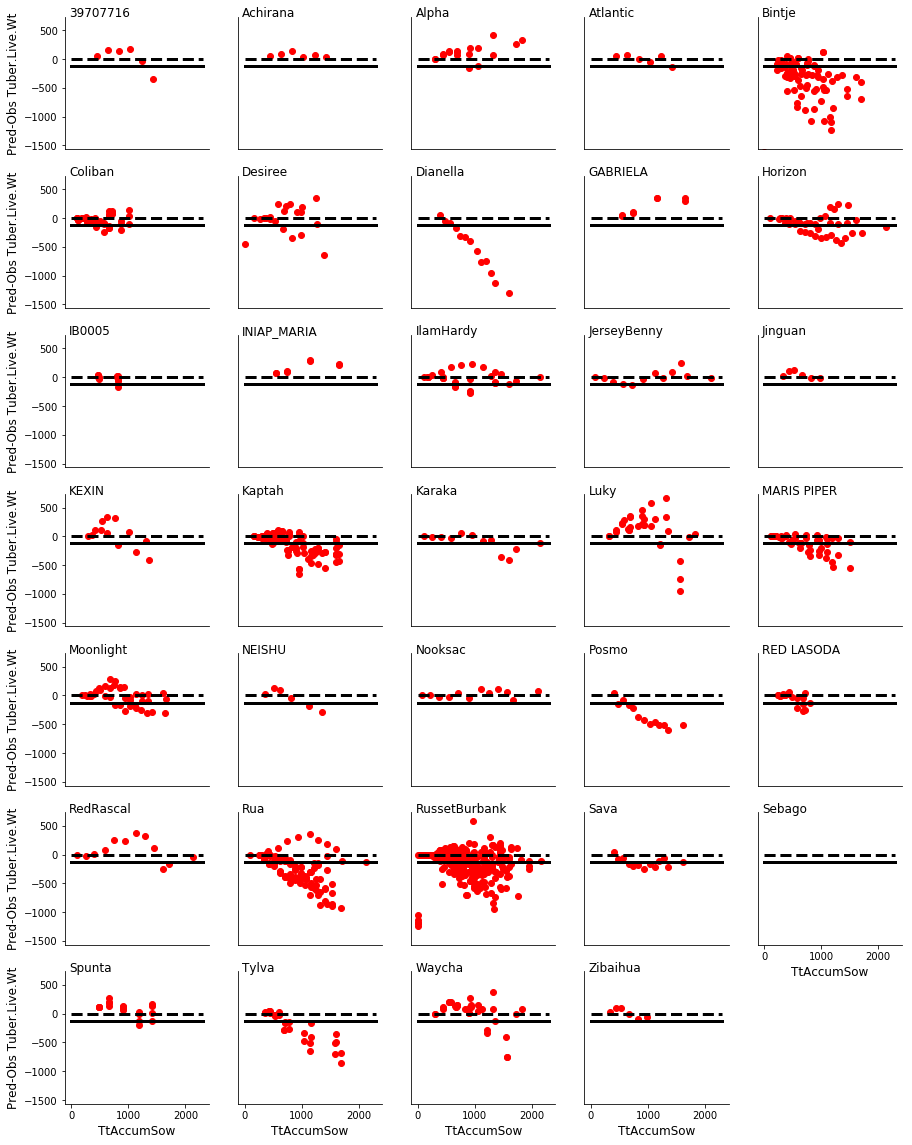

In [138]:
Graph = plt.figure(figsize=(15,20))
ResidulesVsTtSow('Tuber.Live.Wt',CultivarsWithTimeCoarseData,'Cultivar')

## Make Graphs of LAI residuals for each cultivar plotted against thermal time since sowing

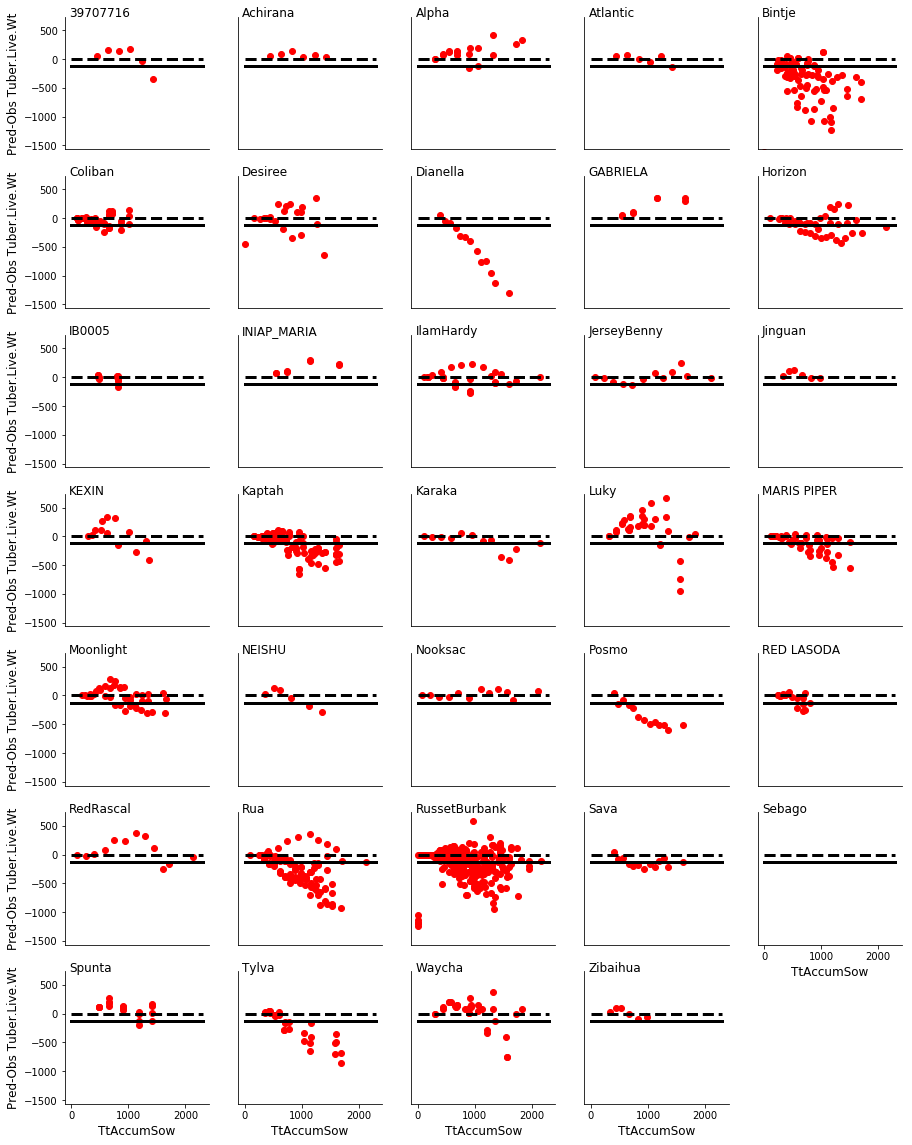

In [139]:
Graph = plt.figure(figsize=(15,20))
ResidulesVsTtSow('Tuber.Live.Wt',CultivarsWithTimeCoarseData,'Cultivar')

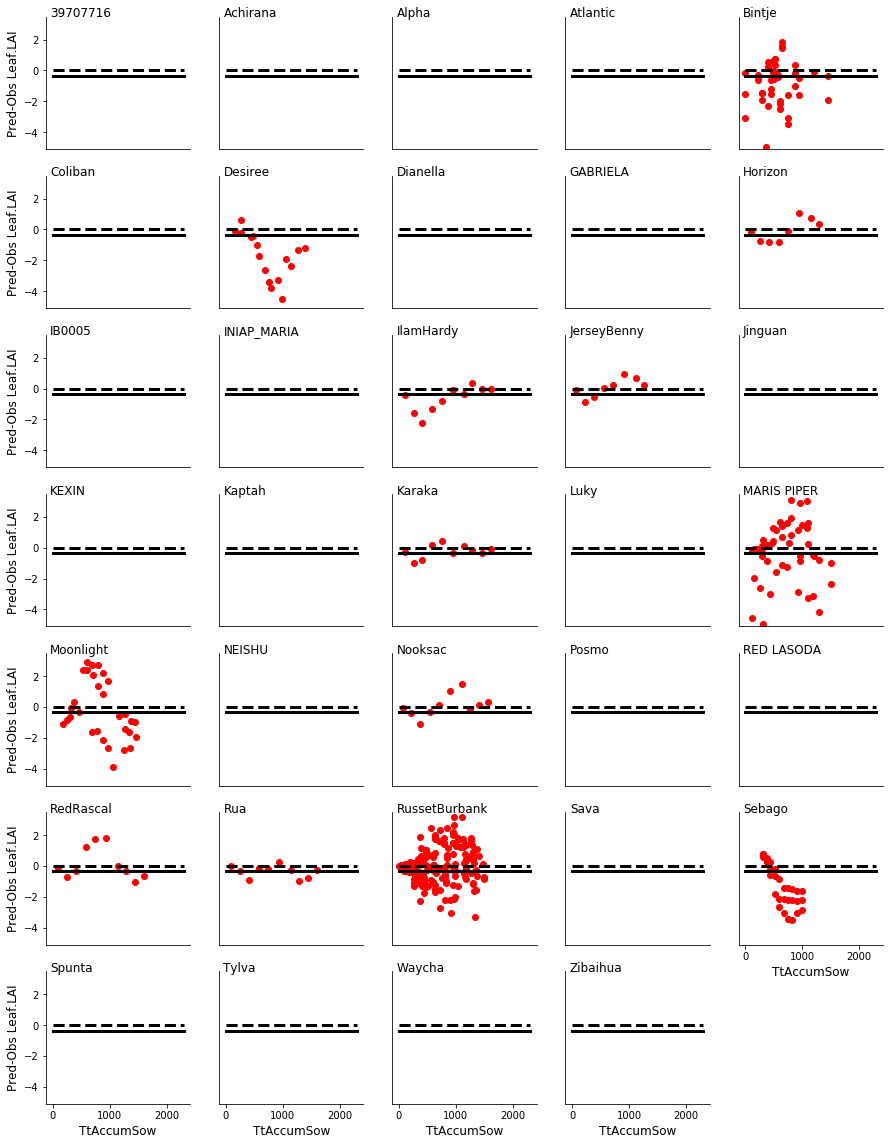

In [140]:
Graph = plt.figure(figsize=(15,20))
ResidulesVsTtSow('Leaf.LAI',CultivarsWithTimeCoarseData,'Cultivar')